### Deep Learning Libraries in Python
* Tensorflow
* theano 
* TFLearn > Tensorflow
* Keras > Tensorflow, theano
* Pytorch  -  FB
* PyCaffe 
* MXnet > MS

### Python IDLEs
* pycharm
* spyder 
* Visual Studio code 
* Sublime 

### AI Case Studies (Use Cases) to check for
* Google Duplex 
* Boston Robotics 
* Amazon shop 
* amazon customer care app 
* siri , alexa, google home 



### Future Sessions
* colored images trainig CNN + optimizers
* RNN + LSTM 
* Handson 
* Chatbots 
* Chatbots 2
* Object Detection + Case studies 


In [22]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
import numpy as np
from keras.datasets import mnist
from keras.models import load_model

In [6]:
model =  Sequential()
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,265.0
Trainable params: 3,265
Non-trainable params: 0.0
_________________________________________________________________


In [8]:
data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))

In [9]:
model.fit(data,labels,epochs=10,batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.7265 - acc: 0.4860     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.7069 - acc: 0.5050     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.7037 - acc: 0.4970     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.6964 - acc: 0.5320     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.6909 - acc: 0.5260     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.6851 - acc: 0.5540     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.6811 - acc: 0.5690     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.6757 - acc: 0.5800     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.6723 - acc: 0.5690     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.6650 - acc: 0.5990     


In [12]:
#model.predict_classes(data)

## MNIST Dataset

In [7]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype('float32') # Cnverting pixel values to float
x_test = x_test.astype('float32')
x_train /= 255   # Pixel normalization
x_test /= 255

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)


model = Sequential()
model.add(Dense(500,activation='relu',input_shape=(784,)))

model.add(Dense(500,activation='relu'))

model.add(Dense(500,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))
model.save("KerasMNIST.model")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_15 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5010      
Total params: 898,510.0
Trainable params: 898,510
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s - loss: 0.2376 - acc: 0.9263 - val_loss: 0.1108 - val_acc: 0.9680
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.0880 - acc: 0.

## MNIST Prediction

In [23]:
model = load_model("KerasMNIST.model")

1/1 [==============================] - 0s
Predicted: 1


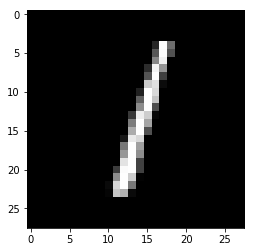

In [24]:
import matplotlib.pyplot as plt
def print_test_image(image_index):
    image = x_test[image_index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

image_index = 2
print("Predicted:",model.predict_classes(x_test[image_index].reshape((1,784)))[0])
print_test_image(image_index)